# Análisis efectuados en artículo "Estrategias de control y seguimiento de proyectos de desarrollo de software"

## Dependencias

In [1]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

## Variables y funciones de utilidad

In [2]:
NOTAS_DIR = '01_notas'
NOTAS_ENTRADA_DIR = os.path.join(NOTAS_DIR, '01_entrada')
NOTAS_RESULTADOS_DIR = os.path.join(NOTAS_DIR, '02_resultados')

NOTAS_21 = os.path.join(NOTAS_ENTRADA_DIR, 'notas_21-22.csv')
NOTAS_22 = os.path.join(NOTAS_ENTRADA_DIR, 'notas_22-23.csv')
NOTAS_23 = os.path.join(NOTAS_ENTRADA_DIR, 'notas_23-24.csv')
ENTREGAS_23 = os.path.join(NOTAS_ENTRADA_DIR, 'entregas_23-24.csv')

CONOCIMIENTOS_DIR = '02_encuesta-conocimientos'
CONOCIMIENTOS_RESPUESTAS_DIR = os.path.join(CONOCIMIENTOS_DIR, '01_respuestas')
CONOCIMIENTOS_RESULTADOS_DIR = os.path.join(CONOCIMIENTOS_DIR, '02_resultados') 

CONOCIMIENTOS_ITEMS = os.path.join(CONOCIMIENTOS_RESPUESTAS_DIR, '00_items.csv')
CONOCIMIENTOS_PRE = os.path.join(CONOCIMIENTOS_RESPUESTAS_DIR, '01_encuestas-pre.csv')
CONOCIMIENTOS_POST = os.path.join(CONOCIMIENTOS_RESPUESTAS_DIR, '02_encuestas-post.csv')
CONOCIMIENTOS_21 = os.path.join(CONOCIMIENTOS_RESPUESTAS_DIR, '03_resultados_21-22.csv')

SATISFACCION_DIR = '03_encuesta-satisfaccion'
SATISFACCION_RESPUESTAS_DIR = os.path.join(SATISFACCION_DIR, '01_respuestas')
SATISFACCION_RESULTADOS_DIR = os.path.join(SATISFACCION_DIR, '02_resultados') 

SATISFACCION_ITEMS = os.path.join(SATISFACCION_RESPUESTAS_DIR, '00_items.csv')
SATISFACCION_LIKERT = os.path.join(SATISFACCION_RESPUESTAS_DIR, '01_respuestas-likert.csv')
SATISFACCION_21 = os.path.join(SATISFACCION_RESPUESTAS_DIR, '02_resultados_21-22.csv')

In [3]:
WIDTH = 800

HEIGHT = 500

CATEGORIAS = {'ambito': ['EI1039', 'EI1048', 'Git', 'Genérica']}

ETIQUETAS = {
    'descripcion': 'Técnica/Herramienta',
    'incremento': 'Incremento relativo (%)',
    'incremento_abs': 'Incremento absoluto (puntos)',
    'incremento_abs_porcentual': 'Incremento absoluto (%)',
    'ambito': 'Ámbito',
    'cantidad': 'Usado por primera vez'
}

COLOR_MAP = {
    'EI1039': px.colors.qualitative.Plotly[0],
    'EI1048': px.colors.qualitative.Plotly[1],
    'Git': px.colors.qualitative.Plotly[2],
    'Trabajo colaborativo': px.colors.qualitative.Plotly[2],
    'Genérica': px.colors.qualitative.Plotly[3],
    'Proyecto': px.colors.qualitative.Plotly[3],
}

SYMBOL_MAP = {
    '2021': 'diamond',
    '2023': 'circle'
}

MOCK_LEGEND_AMBITO_FORMACION = [
    {'name': 'EI1039', 'symbol': 'square', 'color': COLOR_MAP['EI1039']},
    {'name': 'EI1048', 'symbol': 'square', 'color': COLOR_MAP['EI1048']},
    {'name': 'Git', 'symbol': 'square', 'color': COLOR_MAP['Git']},
    {'name': 'Genérica', 'symbol': 'square', 'color': COLOR_MAP['Genérica']}
]

MOCK_LEGEND_CURSO_FORMACION = [
    {'name': '2021', 'symbol': 'diamond-open', 'color': 'black'},
    {'name': '2023', 'symbol': 'circle-open', 'color': 'black'}
]

MOCK_LEGEND_AMBITO_SATISFACCION = [
    {'name': 'Proyecto', 'symbol': 'square', 'color': COLOR_MAP['Proyecto']},
    {'name': 'EI1039', 'symbol': 'square', 'color': COLOR_MAP['EI1039']},
    {'name': 'EI1048', 'symbol': 'square', 'color': COLOR_MAP['EI1048']},
    {'name': 'Trabajo colaborativo', 'symbol': 'square', 'color': COLOR_MAP['Trabajo colaborativo']},
]

MOCK_LEGEND_CURSO_SATISFACCION = [
    {'name': '2021', 'symbol': 'line-ne-open', 'color': 'black'},
    {'name': '2023', 'symbol': 'square', 'color': 'black'}
]

In [4]:
def style_figure(fig, **kwargs):
    '''
    Changes the style (layout) of the figure. By default, it reverses the yaxis for a better top-down read and adds a border to the legend.
    The funcions allow more styling configurations by adding extra parameters complying with plotly.grapg_objects.Layout.
    
    Args:
        fig(plotly.graph_objects.Figure): original Plotly figure.
        **kwargs: extra configuration parameters complying with plotly.graph_objects.Layout, and using the 'magic underscores'.
    
    Returns:
        plotly.graph_objects.Figure: Plotly figure with legend on top of the plot.
    '''
    fig.update_layout(
        yaxis_autorange='reversed',
        legend=dict(
            title='',
            borderwidth=1,
        ),
        font_size=14,
        **kwargs
    )
    
    return fig


def legend_on_top(fig):
    '''
    Configures the legend of the figure on top of the plot.   
    
    Args:
        fig(plotly.graph_objects.Figure): original Plotly figure.
    
    Returns:
        plotly.graph_objects.Figure: Plotly figure with legend on top of the plot.
    '''
    fig.update_layout(
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        )
    )
    
    return fig


def barplot_styler(fig, **kwargs):
    return legend_on_top(style_figure(fig, **kwargs))


def mock_legend(fig, legend_groups, offset):
    '''
    When both colors and shapes are used in Plotly Express, Plotly is unable automatically separate the legend groups.
    This makes the legend difficult to interpret. This function creates a legible legend by adding 'fake' traces,
    manually indicating the legend groups, items colors, shapes, etc.   
    
    Args:
        fig(plotly.graph_objects.Figure): original figure with plotly's autogenerated legend.
        legend_groups: list containing an entry for each legend group. Each entry must include the name,
            symbol and color of each item group. See: `MOCK_LEGEND_AMBITO_*` and `MOCK_LEGEND_CURSO_*`.
        offset(float): separation to apply between legend groups. 
    
    Returns:
        plotly.graph_objects.Figure: figure with mocked legend.
    '''

    for trace in fig.data:
        trace.showlegend = False
            
    for i, (group, items) in enumerate(legend_groups.items()):
        legend_id = f'legend{i+2}'
        for item in items:
            fig.add_trace(
                go.Scatter(
                    y=[None], mode='markers',
                    marker=dict(symbol=item['symbol'], color=item['color'], size=12),
                    legend=legend_id, #legendgroup=group, legendgrouptitle_text=group,
                    name=item['name'],
                )
            )
        fig.update_layout({
            legend_id: {
                'title': group,
                'orientation': 'h',
                'yanchor': 'bottom',
                'y': 1.02 + offset * (len(legend_groups) - (i + 1)),
                'xanchor': 'right',
                'x': 1,
                'borderwidth': 1
            }
        })
    
    return fig

In [5]:
def evolution_plot(df, steps, labels, color, height=HEIGHT, width=WIDTH):
    '''
    Creates a parallel categories plot using Plotly Express.
    
    Args:
        df(pandas.DataFrame): data.
        steps(list[str]): list of categories.
        labels(list[str]): list of labels mapping the categories.
        color(str): attribute to be used to color the categories.
        height(int): height of the figure. Defaults to `HEIGHT`.
        width(int): width of the figure. Defaults to `WIDTH`.
        
    Returns:
        plotly.graph_objects.Figure: Plotly parallel catergories plot.
    '''
    fig = px.parallel_categories(
        df, 
        dimensions=steps,
        color=color, color_continuous_scale=px.colors.sequential.Rainbow,
        labels=labels
    )

    fig.update_layout(
        coloraxis_showscale=False,
        width=width,
        height=height
    )
    fig.update_traces(dimensions=[{"categoryorder": "category descending"}], tickfont_size=12, labelfont_size=14, line_shape='hspline')
    fig.data[0].dimensions[0]['categoryorder'] = 'category ascending'
    
    return fig


def bar_plot(data, x, y, color, shape=None, text_format='%{text}', xrange=None, styler=barplot_styler, height=HEIGHT, width=WIDTH):
    '''
    Creates a bar plot using Plotly Express
    
    Args:
        data(pandas.DataFrame): data.
        x(str): column of the data frame used for x axis.
        y(str): column of the data frame used for y axis.
        color(str): column of the data frame used for coloring the data.
        shape(str): column of the data frame used for adding patterns to the data.
        text_format(str): Plotly text template to format the labels shown in the plot.
        apply_style(fun): defines the style to apply to the figure.
        height(int): height of the figure. Defaults to `HEIGHT`.
        width(int): width of the figure. Defaults to `WIDTH`.
        
    
    Returns:
        plotly.graph_objects.Figure: Plotly bar plot.
    '''
    fig = px.bar(
        data, x=x, y=y, color=color, pattern_shape=shape,
        text=x if text_format is not None else None,
        category_orders=CATEGORIAS,
        labels=ETIQUETAS,
        height=height, width=width
    )
    fig.update_traces(textposition="outside", texttemplate=text_format)
    fig = styler(fig, xaxis_range=xrange)
    
    return fig


def dumbbell_plot(data, x, y, color, symbol, height=HEIGHT, width=WIDTH):
    '''
    Creates a Dumbbell plot using Plotly Express, annotations and shapes.
    
    Args:
        data(pandas.DataFrame): data.
        x(str): column of the data frame used for x axis.
        y(str): column of the data frame used for y axis.
        color(str): column of the data frame used for coloring the data samples.
        symbol(str): column of the data frame used for determining the symbol of the data sample.
        height(int): height of the figure. Defaults to `HEIGHT`.
        width(int): width of the figure. Defaults to `WIDTH`.
        
    
    Returns:
        plotly.graph_objects.Figure: Plotly plot.
    '''
    def compute_annotation_shift(increment):
        increment_length = len(str(increment))
        if increment_length == 4:
            return 42#37
        if increment_length == 5:
            return 45#40
        if increment_length == 6:
            return 50#45
        
    fig = go.Figure()
    
    #color_dimension = data[color].unique()
    symbol_dimension = data[symbol].unique()
    
    for color_dim in CATEGORIAS[color]:
        for symbol_dim in symbol_dimension:
            fig.add_trace(
                go.Scatter(
                    x=data[(data[color] == color_dim) & (data[symbol] == symbol_dim)][x].values,
                    y=data[(data[color] == color_dim) & (data[symbol] == symbol_dim)][y].values,
                    mode='markers',
                    marker_color = COLOR_MAP[color_dim],
                    marker_symbol = SYMBOL_MAP[symbol_dim],
                    marker_size = 12,
                    marker_line_width = 2,
                    marker_line_color = 'DarkSlateGrey'
                )
            )
        
    for item in data['descripcion'].unique():
        item_data = data[data['descripcion'] == item].sort_values(by='year')
        if len(item_data) == 1:
            continue
            
        incremento_pre = item_data.incremento_abs.values[0]
        incremento_current = item_data.incremento_abs.values[1]
        

        fig.add_shape(
            type="line",
            layer="below",
            y0=item, x0=incremento_pre,
            y1=item, x1=incremento_current, 
            line=dict(
                color=COLOR_MAP[item_data.ambito.values[0]],
                width=5,
            ),
            opacity=0.5
        )

        inc = round((incremento_current - incremento_pre) / incremento_pre * 100, 2)
        shift = compute_annotation_shift(inc)
        
        fig.add_annotation(
            x=incremento_current,
            y=item,
            text=f'<b>{"+" if inc > 0 else ""}{inc}%</b>',
            xshift=shift if inc > 0 else -shift + 5,
            showarrow=False
        )
    
    
    fig = style_figure(
        fig, yaxis_showgrid=False, 
        height=height, width=width, 
        xaxis_title='Incremento absoluto (puntos)', yaxis_title='Técnica/Herramienta')
    
    fig = mock_legend(
        fig, 
        {
            'Ámbito': MOCK_LEGEND_AMBITO_FORMACION,
            'Curso': MOCK_LEGEND_CURSO_FORMACION
        },
        0.12
    )
        
    return fig


def comparative_bar_plot(df, height=HEIGHT, width=WIDTH):
    '''
    Creates a grouped bar plot using Plotly Express. Hardcoded as hell.
    
    Args:
        df(pandas.DataFrame): data.
    
    Returns:
        plotly.graph_objects.Figure: Plotly grouped bar plot.
    '''
    df = df.reset_index()
    x = df['item'].unique()
    medias_21 = df[df.year == '2021']['valor'].values
    medias_23 = df[df.year == '2023']['valor'].values
    fig = go.Figure(data=[
        go.Bar(name='2021', x=x, y=medias_21, 
               marker_color=[COLOR_MAP[val] for val in df[df.year == '2021']['ambito']],
               marker_pattern_shape='/'
              ),
        go.Bar(name='2023', x=x, y=medias_23, marker_color=[COLOR_MAP[val] for val in df[df.year == '2023']['ambito']])
    ])

    fig.update_layout({
        'xaxis': {
            'title': 'Cuestiones',
            'range':[0.5,28.5], 
            'dtick':1,
        },
        'yaxis': {
            'title': 'Puntuación media',
            'range': [2, 5],
            'dtick': 0.5,
        }, 
        'font_size': 14,
        'height': height,
        'width': width
    })
    
    fig = mock_legend(
        fig,
        {
            'Ámbito': MOCK_LEGEND_AMBITO_SATISFACCION,
            'Curso': MOCK_LEGEND_CURSO_SATISFACCION
        },
        0.2
    )
    
    return fig

## Análisis de acciones de control

### Carga de datos

- Resultado de entregas del curso 23/24 (`01_notas/entregas_23-24`)
- Notas de proyecto del curso 23/24 (`01_notas/notas_23-24.csv`)
- Notas de proyecto del curso 22/23 (`01_notas/notas_22-23.csv`)
- Notas de proyecto del curso 21/22 (`01_notas/notas_21-22.csv`)

In [6]:
entregas_23 = pd.read_csv(ENTREGAS_23)
notas_23 = pd.read_csv(NOTAS_23, index_col=0)
notas_22 = pd.read_csv(NOTAS_22, index_col=0)
notas_21 = pd.read_csv(NOTAS_21, index_col=0)

### Evolución de los equipos

Se visualiza la trayectoria de los equipos durante el curso, mostrando los resultados obtenidos en cada entrega y en la nota final del proyecto. Los resultados de las entregas parciales son:

- _superada_: entrega calificada como "superada".
- _amarilla->superada_: entrega calificada como "tarjeta amarilla" cuyas deficiencias se han resuelto posteriormente.
- _amarilla->amarilla_: entrega calificada como "tarjeta amarilla" cuyas deficiencias no se han resuelto.

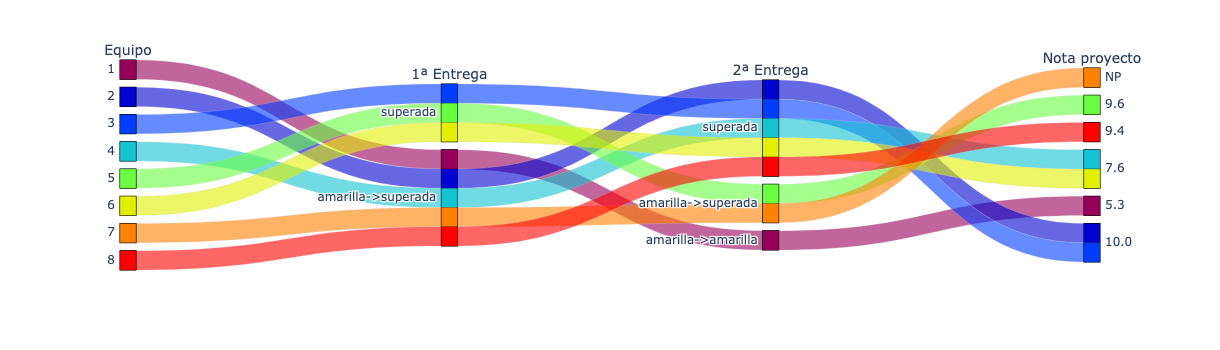

In [7]:
evolucion_fig = evolution_plot(
    entregas_23, 
    steps=['id_grupo', 'primera_entrega', 'segunda_entrega', 'nota_proyecto'],
    labels={'id_grupo':'Equipo', 'primera_entrega':'1ª Entrega', 'segunda_entrega':'2ª Entrega', 'nota_proyecto': 'Nota proyecto'},
    color='id_grupo',
    height=350, width=700
)
evolucion_fig

### Estadísticas de resultados

Se calculan las siguientes estadísticas para los cursos 21/22, 22/23 y 23/24:
- Tasa de presentados
- Tasa de aprobados
- Nota media

In [8]:
def calcula_estadisticas_notas(df):
    no_presentados = len(df[df.nota_proyecto.isna()])
    presentados = len(df[~df.nota_proyecto.isna()])
    aprobados = len(df[df.nota_proyecto >= 5])
    total = presentados + no_presentados

    print(f'Número total de estudiantes: {total}')
    print(f'Estudiantes presentados: {presentados} ({presentados/total:.2%})')
    print(f'Estudiantes no presentados: {no_presentados} ({no_presentados/total:.2%})')
    print(f'Estudiantes aprobados: {aprobados} ({aprobados/presentados:.2%})')
    print(f'Nota media: {df.nota_proyecto.mean():.2f}')

In [9]:
calcula_estadisticas_notas(notas_23)

Número total de estudiantes: 27
Estudiantes presentados: 23 (85.19%)
Estudiantes no presentados: 4 (14.81%)
Estudiantes aprobados: 23 (100.00%)
Nota media: 8.48


In [10]:
calcula_estadisticas_notas(notas_22)

Número total de estudiantes: 22
Estudiantes presentados: 17 (77.27%)
Estudiantes no presentados: 5 (22.73%)
Estudiantes aprobados: 11 (64.71%)
Nota media: 5.24


In [11]:
calcula_estadisticas_notas(notas_21)

Número total de estudiantes: 27
Estudiantes presentados: 25 (92.59%)
Estudiantes no presentados: 2 (7.41%)
Estudiantes aprobados: 19 (76.00%)
Nota media: 7.02


### Almacenamiento de resultados

In [12]:
evolucion_fig.write_image(os.path.join(NOTAS_RESULTADOS_DIR, 'evolucion.pdf'))
evolucion_fig.write_html(os.path.join(NOTAS_RESULTADOS_DIR, 'evolucion.html'))

## Análisis del incremento de la formación del alumnado

### Carga de datos

- Descripción de técnicas/herramientas consultadas en la encuesta (`02_encuesta-conocimientos/01_respuestas/00_items.csv`)
- Respuestas a las encuestas pre (`02_encuesta-conocimientos/01_respuestas/01_encuestas-pre.csv`)
- Respuestas a las encuestas post (`02_encuesta-conocimientos/01_respuestas/02_encuestas-post.csv`)
- Resultados de las encuestas del curso 2021/2022 (`02_encuesta-conocimientos/01_respuestas/03_resultados_21-22.csv`)

In [13]:
items = pd.read_csv(CONOCIMIENTOS_ITEMS, index_col=0)
encuestas_pre = pd.read_csv(CONOCIMIENTOS_PRE, index_col=[0,1])
encuestas_post = pd.read_csv(CONOCIMIENTOS_POST, index_col=[0,1])
resultados_2021 = pd.read_csv(CONOCIMIENTOS_21, index_col=0)

respuestas = encuestas_pre.join(encuestas_post, lsuffix='_pre', rsuffix='_post')

### Filtrado 

- Eliminación de instancias con valores nulos

In [14]:
respuestas = respuestas.dropna(subset=['conocimiento_pre', 'conocimiento_post'])

- Se consideran las técnicas/herramientas que los estudiantes han usado en el proyecto

In [15]:
respuestas = respuestas[respuestas.uso_post == 'SI']

In [16]:
estudiantes = respuestas.index.get_level_values('id_estudiante').unique()
print(f'Han contestado la encuesta pre y post {len(estudiantes)} estudiantes.')

Han contestado la encuesta pre y post 18 estudiantes.


### Evolución

Cálculo de medias de técnicas/herramientas, incluyendo incremento porcentual.

#### Incrementos relativos

Incremento del conocimiento **post** con respecto al conocimiento **pre**. Un incremento del 100% indica que el conocimiento se ha duplicado. Esto implica que los incrementos de diferentes items **no son comparables** entre sí.

In [17]:
medias = respuestas[['conocimiento_pre', 'conocimiento_post']].groupby(['item']).mean()
medias['incremento'] = medias.pct_change(axis=1)['conocimiento_post'] * 100
medias = medias.drop([14]) # Ningun equipo aplicó la herramienta/técnica 14
medias = medias.join(items)

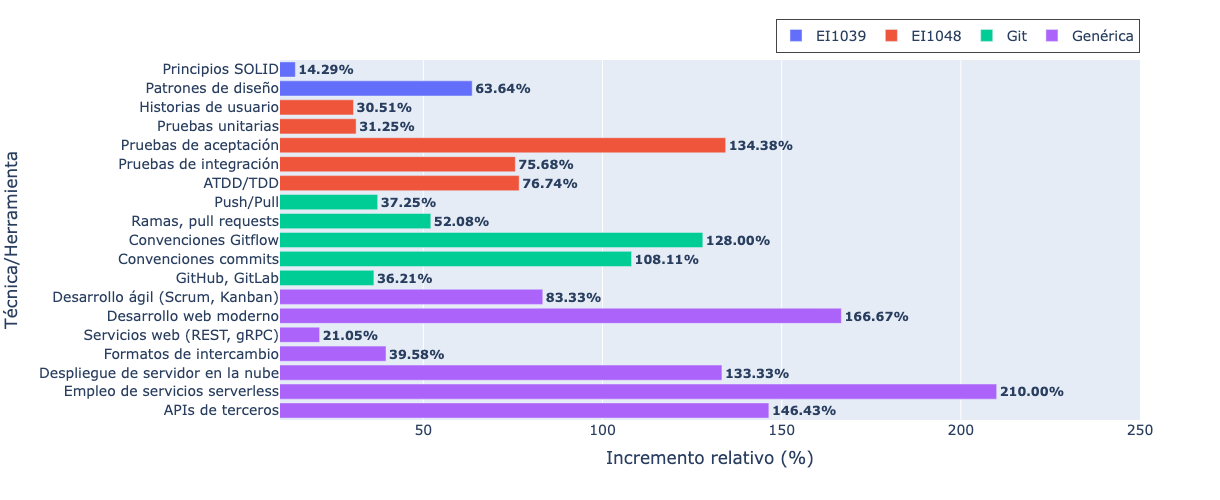

In [18]:
incremento_relativo_fig = bar_plot(
    medias, 
    x='incremento', y='descripcion', color='ambito',
    text_format='<b>%{text:.2f}%</b>',
    xrange=[10, 250]
)
incremento_relativo_fig

#### Incrementos absolutos

Incremento del conocimiento **post** con respecto al conocimiento **pre** de forma absoluta, teniendo en cuenta el máximo incremento posible.

Dado que la mínima puntuación posible es **1** y la máxima es **5**, el máximo incremento posible es **4**. De esta forma:
- Un incremento de **0** puntos equivale a un incremento porcentual absoluto de **0%**.
- Un incremento de **1** puntos equivale a un incremento porcentual absoluto de **25%**.
- Un incremento de **2** puntos equivale a un incremento porcentual absoluto de **50%**.
- Un incremento de **3** puntos equivale a un incremento porcentual absoluto de **75%**.
- Un incremento de **4** puntos equivale a un incremento porcentual absoluto de **100%**.

In [19]:
diferencias = respuestas.loc[:,('conocimiento_pre', 'conocimiento_post')]
diferencias['incremento_abs'] = diferencias.diff(axis=1)['conocimiento_post']
diferencias = pd.DataFrame(diferencias['incremento_abs'].groupby(['item']).mean())
diferencias['incremento_abs_porcentual'] = diferencias['incremento_abs'] / 4 * 100
diferencias = diferencias.join(items)
diferencias = diferencias.drop([14])

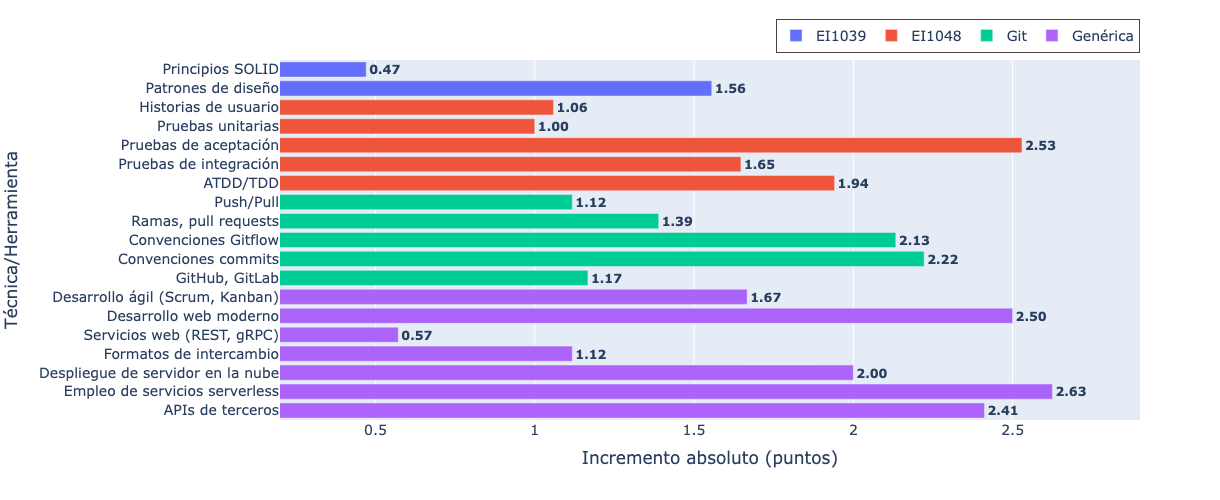

In [20]:
incremento_absoluto_fig = bar_plot(
    diferencias, 
    x='incremento_abs', y='descripcion', color='ambito', 
    text_format='<b>%{text:.2f}</b>',
    xrange=[0.2, 2.9]
)
incremento_absoluto_fig

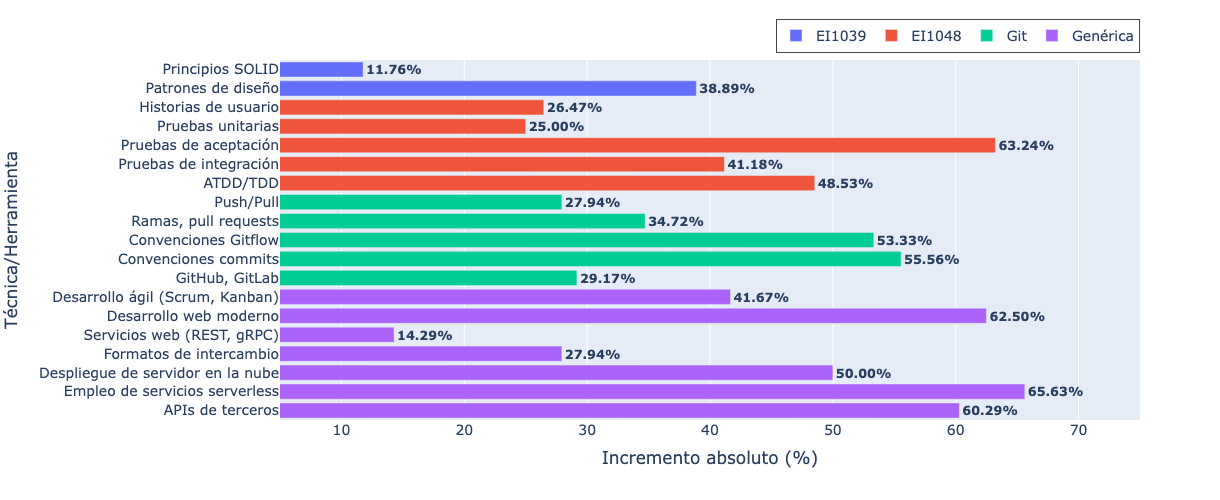

In [21]:
incremento_absoluto_porcentual_fig = bar_plot(
    diferencias, 
    x='incremento_abs_porcentual', y='descripcion', color='ambito', 
    text_format='<b>%{text:.2f}%</b>',
    xrange=[5, 75]
)
incremento_absoluto_porcentual_fig

#### Comparación con curso 2021/2022

In [22]:
incrementos_2023 = diferencias.copy()
incrementos_2023['year'] = '2023'

In [23]:
incrementos_2021 = resultados_2021.dropna().copy()
incrementos_2021['incremento_abs_porcentual'] = incrementos_2021['incremento_abs'] / 4 * 100
incrementos_2021['year'] = '2021'
incrementos_2021 = incrementos_2021.join(items)

Se eliminan las técnicas/herramientas que no se han utilizado en ambos cursos

In [24]:
incrementos_2023 = incrementos_2023.loc[incrementos_2023.index.isin(incrementos_2021.index)]
incrementos_2021 = incrementos_2021.loc[incrementos_2021.index.isin(incrementos_2023.index)]

In [25]:
comparacion_incrementos = pd.concat([incrementos_2023, incrementos_2021])

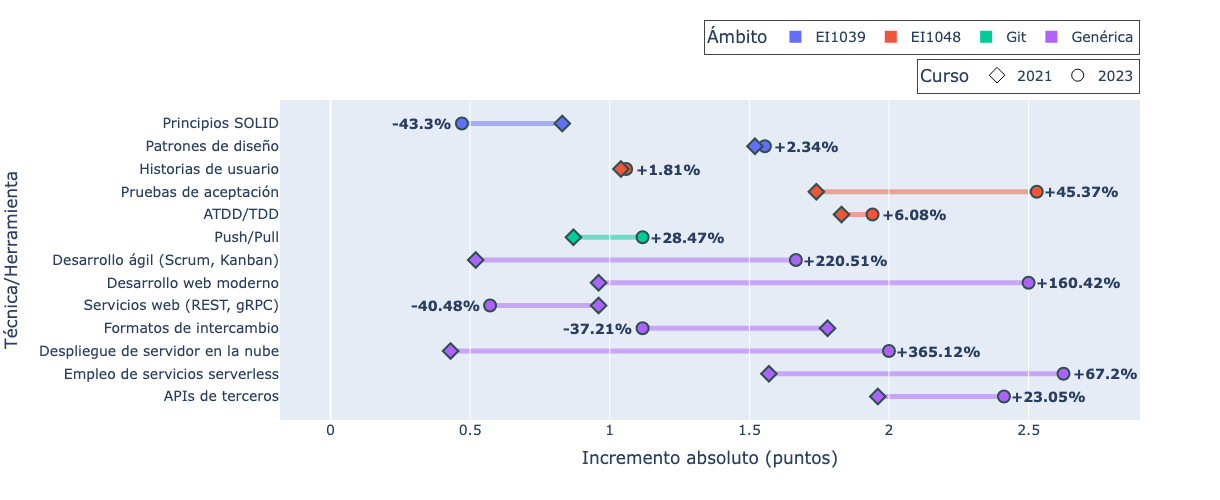

In [26]:
comparativa_incrementos_fig = dumbbell_plot(
    comparacion_incrementos, 
    x='incremento_abs', y='descripcion', color='ambito', symbol='year'
)
comparativa_incrementos_fig

### Almacenamiento de resultados

In [27]:
incremento_relativo_fig.write_image(os.path.join(CONOCIMIENTOS_RESULTADOS_DIR, '01_inc-relativo.pdf'))
incremento_absoluto_fig.write_image(os.path.join(CONOCIMIENTOS_RESULTADOS_DIR, '02_inc-abs.pdf'))
incremento_absoluto_porcentual_fig.write_image(os.path.join(CONOCIMIENTOS_RESULTADOS_DIR, '02_inc-abs-perc.pdf'))
comparativa_incrementos_fig.write_image(os.path.join(CONOCIMIENTOS_RESULTADOS_DIR, '03_comparativa-incrementos.pdf'))

## Análisis de la experiencia/satisfaccion

### Carga de datos

- Descripción de las preguntas de la encuesta (`03_encuestas-satisfaccion/01_respuestas/00_items.csv`)
- Respuestas a las encuestas likert (`03_encuestas-satiscaccion/01_respuestas/01_encuestas-likert.csv`)
- Resultados de las encuestas del curso 2021/2022 (`03_encuestas-satisfaccion/01_respuestas/02_resultados_21-22.csv`)

In [28]:
items = pd.read_csv(SATISFACCION_ITEMS, index_col=0)
respuestas_likert = pd.read_csv(SATISFACCION_LIKERT, index_col=[0,1])
resultados_2021 = pd.read_csv(SATISFACCION_21, index_col=0)

In [29]:
respuestas = respuestas_likert.index.get_level_values('id_estudiante').unique()

print(f'Han contestado la encuesta de satisfacción likert {len(respuestas)} estudiantes.')

Han contestado la encuesta de satisfacción likert 14 estudiantes.


### Satisfacción media y comparativa con curso 2021/2022

In [30]:
medias_likert = respuestas_likert.groupby(['item']).mean()
medias_likert = medias_likert.join(items)
medias_2023 = medias_likert.copy()
medias_2023['year'] = '2023'

medias_2021 = resultados_2021.copy()
medias_2021['year'] = '2021'
medias_2021 = medias_2021.join(items)

In [31]:
comparativa_satisfaccion_21_23 = pd.concat([medias_2021, medias_2023])

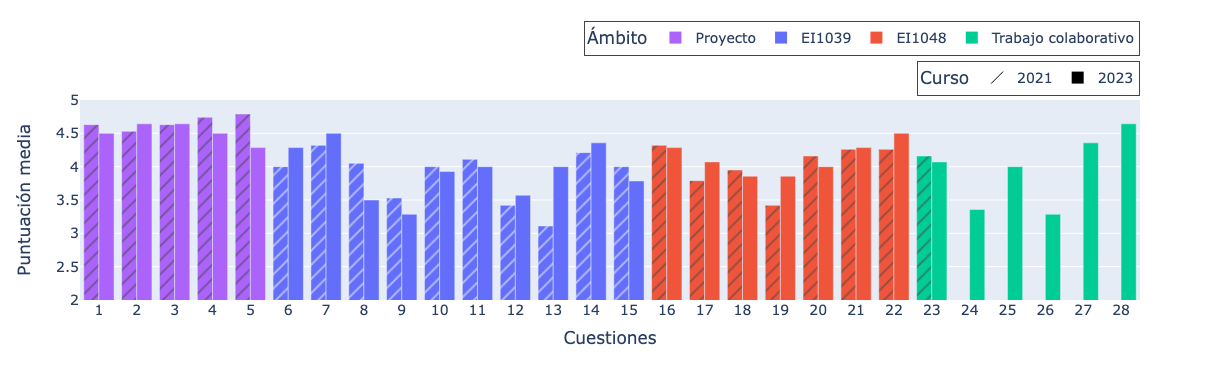

In [32]:
comparativa_satisfaccion_fig = comparative_bar_plot(comparativa_satisfaccion_21_23, height=380, width=850)
comparativa_satisfaccion_fig

#### Medias agrupadas por ámbito

In [33]:
medias_ambito_2023 = medias_2023[['valor', 'ambito']].groupby(['ambito']).mean()
medias_ambito_2021 = medias_2021[['valor', 'ambito']].groupby(['ambito']).mean()
comparativa_medias = medias_ambito_2021.join(medias_ambito_2023, lsuffix='_2021', rsuffix='_2023')
comparativa_medias

valor_2021  valor_2023
ambito                                      
EI1039                  3.875000    3.921429
EI1048                  4.022857    4.122449
Proyecto                4.664000    4.514286
Trabajo colaborativo    4.160000    3.952381

En general, las medias de las categorías son satisfactorias (cercanas o superiores a 4) y no se aprecian diferencias significativas entre ambos cursos.

*No se debe tener en cuenta la media de **Trabajo colaborativo** en los resultados de 2021, ya que la categoría se añadió en el curso 2023.

### Almacenamiento de resultados

In [34]:
comparativa_satisfaccion_fig.write_image(os.path.join(SATISFACCION_RESULTADOS_DIR, '01_comparativa-satisfaccion.pdf'))
comparativa_medias.to_csv(os.path.join(SATISFACCION_RESULTADOS_DIR, '02_comparativa-medias-satisfaccion.csv'))